In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

df = pd.read_csv('/content/training.csv')

train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

model = make_pipeline(CountVectorizer(), MultinomialNB())


model.fit(train_data, train_labels)

predictions = model.predict(test_data)

accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(test_labels, predictions))

def predict_sentiment(tweet):

    result = model.predict([tweet])
    return result[0]


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       946
           1       0.69      0.97      0.80      1021
           2       0.92      0.16      0.28       296
           3       0.90      0.56      0.69       427
           4       0.85      0.50      0.63       397
           5       1.00      0.04      0.07       113

    accuracy                           0.74      3200
   macro avg       0.85      0.53      0.55      3200
weighted avg       0.78      0.74      0.70      3200



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

df = pd.read_csv('/content/training.csv')

train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(train_data, train_labels)

predictions = model.predict(test_data)
emotion_mapping = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear'
}
def predict_sentiment(tweet):
    result = model.predict([tweet])
    predicted_emotion = emotion_mapping[result[0]]
    return predicted_emotion
new_tweet = "Pakistan won the match"
predicted_emotion = predict_sentiment(new_tweet)
print(f"Predicted emotion: {predicted_emotion}")


Predicted emotion: Joy


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       946
           1       0.69      0.97      0.80      1021
           2       0.92      0.16      0.28       296
           3       0.90      0.56      0.69       427
           4       0.85      0.50      0.63       397
           5       1.00      0.04      0.07       113

    accuracy                           0.74      3200
   macro avg       0.85      0.53      0.55      3200
weighted avg       0.78      0.74      0.70      3200



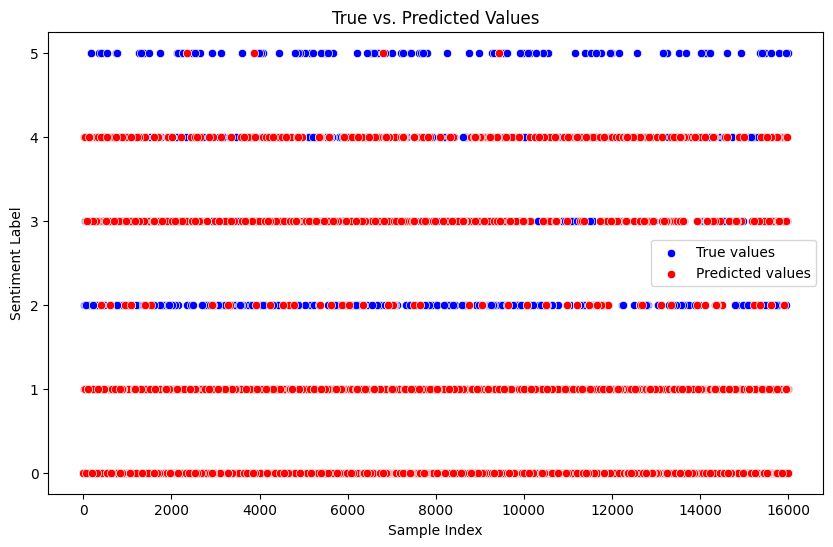

R2 Score: 0.16
Validation Score (K=3): 0.73
Validation Score (K=5): 0.74
Validation Score (K=10): 0.75


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

df = pd.read_csv('/content/training.csv')

train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train_data, train_labels)

predictions = model.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test_labels, predictions))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_data.index, y=test_labels, label='True values', color='blue')
sns.scatterplot(x=test_data.index, y=predictions, label='Predicted values', color='red')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Label')
plt.legend()
plt.show()

from sklearn.metrics import r2_score

r2 = r2_score(test_labels, predictions)
print(f"R2 Score: {r2:.2f}")

from sklearn.model_selection import cross_val_score, KFold

for folds in [3, 5, 10]:
    cv_scores = cross_val_score(model, df['text'], df['label'], cv=KFold(n_splits=folds, shuffle=True, random_state=42))
    print(f'Validation Score (K={folds}): {cv_scores.mean():.2f}')




In [30]:
if len(df['label'].unique()) == 2:
    y_bin = label_binarize(test_labels, classes=df['label'].unique())
    predictions_bin = label_binarize(predictions, classes=df['label'].unique())

    fpr, tpr, _ = roc_curve(y_bin.ravel(), predictions_bin.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
else:
    print("ROC curve is not applicable for multi-class classification.")


ROC curve is not applicable for multi-class classification.


 ROC Curve no applicable becasuse sentiment analysis task involves predicting multiple classes (e.g., sad,happy,joy,excited ), making it a multi-class classification

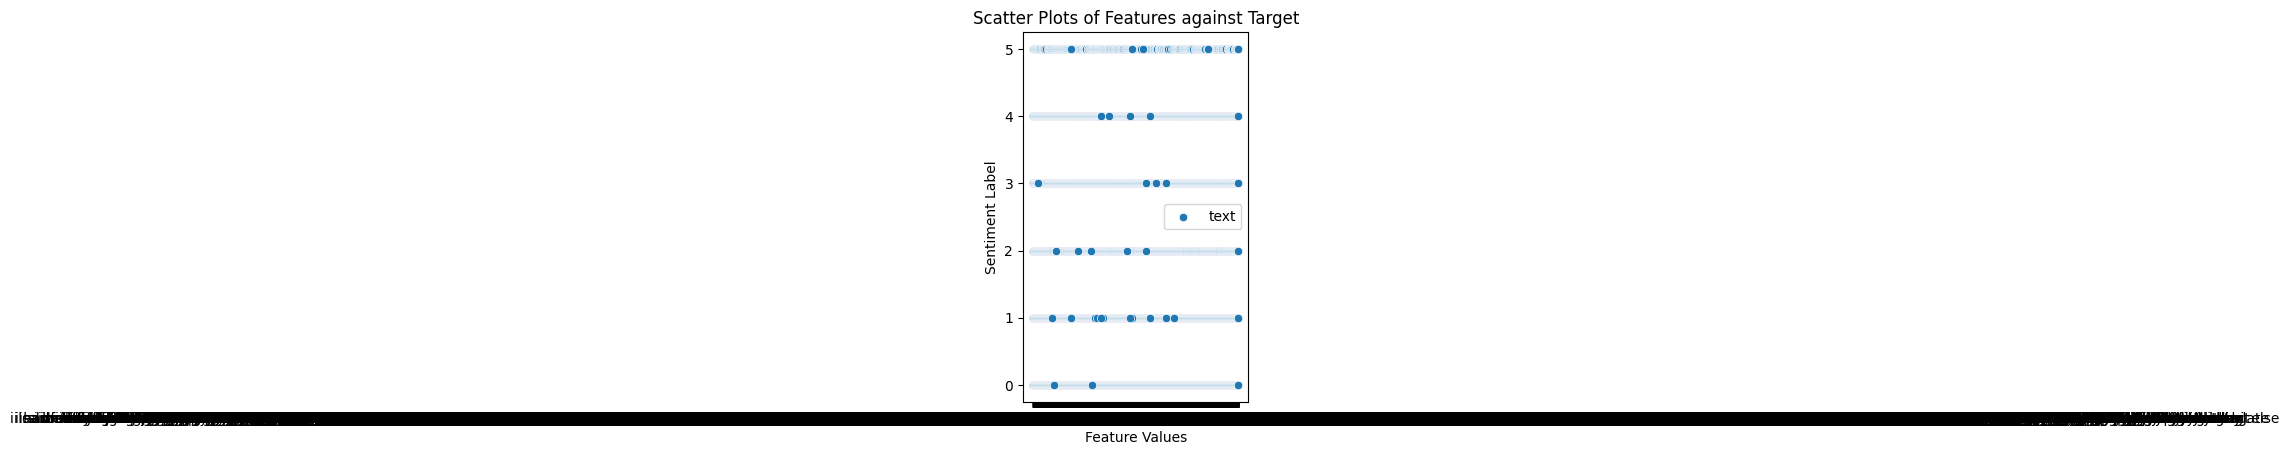

In [16]:
features = df.columns[:-1]
plt.subplot(1, 2, 2)
for feature in features:
    sns.scatterplot(x=df[feature], y=df['label'], label=feature)
plt.title('Scatter Plots of Features against Target')
plt.xlabel('Feature Values')
plt.ylabel('Sentiment Label')
plt.legend()
plt.show()